In [82]:
%reset -f

In [83]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from time import time

import re

from colorama import Style, Fore, Back

from collections import Counter

# 1. Getting Data

### ...from Database

 - SQL is the most popular database querying tool/language
<br>
 - To get started with SQL, try <a href='https://selectstarsql.com/'>this</a> interactive tutorial
<br>
 - Python has libraries for connecting to and interacting with databases (e.g. <a href='https://pypi.org/project/pyodbc/'>pyodbc</a>)

### ...from file (example using CSV file)

In [84]:
dfChurn = pd.read_csv('churn_data.csv')

dfChurn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


### ...from file (example using EXCEL file)

 - Individual sheets can be read from excel files
 - Each sheet can be assigned its own dataframe

In [85]:
defaultSheet = pd.read_excel('dataDict.xlsx')

defaultSheet.head()

,Column,Data Type,Description
0,Feature_1,INT,This feature takes only INTEGER values
1,Feature_2,FLOAT,This feature takes only FLOAT values
2,Feature_3,INT,This feature takes only INTEGER values
3,Feature_4,STRING,This feature takes only STRING values
4,Feature_5,LIST,This feature takes only LIST values


In [86]:
sheet_1 = pd.read_excel('dataDict.xlsx', sheet_name='First_Sheet')

sheet_1.head()

,Column,Data Type,Description
0,Feature_1,INT,This feature takes only INTEGER values
1,Feature_2,FLOAT,This feature takes only FLOAT values
2,Feature_3,INT,This feature takes only INTEGER values
3,Feature_4,STRING,This feature takes only STRING values
4,Feature_5,LIST,This feature takes only LIST values


In [87]:
sheet_2 = pd.read_excel('dataDict.xlsx', sheet_name='Second_Sheet')

sheet_2.head()

,Column,Num Missing Values
0,Feature_1,0
1,Feature_2,127
2,Feature_3,0
3,Feature_4,54
4,Feature_5,12


# 2. Cleaning Data
 - Sometimes data can come in formats that are not easy to work with
 - This can happen in so many different ways (e.g. wrong types, inconsistent formats, missing characters, extra characters, etc.)
 - The goal of "data cleaning" is to make the data usable
 - We'll look at a simple example of the reported memory capacity of some machines (inconsistent format)

In [88]:
dfSys = pd.read_csv('MachineMemory.txt')
dfSys

,MachineID,MemoryDesc
0,Machine_1,This is 6.4GB
1,Machine_2,7.8 GB
2,Machine_3,2GB
3,Machine_4,8 GB
4,Machine_5,"8 GB, 6GB"
5,Machine_6,1 X 1.6 GB
6,Machine_7,5 X 3.4GB
7,Machine_8,"1 X 2.4 GB, 4 X 5.2 GB"
8,Machine_9,"2 X 9.3GB, 3X 11.7GB"
9,Machine_10,"1 X2.38GB, 1X 11.7GB"


In [89]:
def getMemory(name):
    multiplierDict = {'MB':0.001, 'GB':1.0, 'TB':1000.0}
    thisMatch = re.findall(r'([0-9]{0,})[ ]{0,}X[ ]{0,}([0-9]{1,3}[\.]{0,1}[0-9]{0,3})[ ]{0,}([MGT]B)', name)
    thisOtherMatch = re.findall(r'([0-9]{1,3}[\.]{0,1}[0-9]{0,3})[ ]{0,}([MGT]B)', name)
    thisNumericalMatch = re.findall(r'[ ]*([0-9]{0,}[\.]{0,1}[0-9]{0,})[ ]*', name)
    try:
        if thisMatch:
            return sum([float(i[0])*float(i[1])*multiplierDict[i[2]] for i in thisMatch])
        elif thisOtherMatch:
            return sum([float(i[0])*multiplierDict[i[1]] for i in thisOtherMatch])
        elif thisNumericalMatch:
            x = [i for i in thisNumericalMatch if i!='']
            if len(x)==0:
                return None
            elif len(x)>0:
                return sum([float(i) for i  in x if i!=''])
        else:
            return None
    except ValueError:
        return None

In [90]:
dfSys['MemorySize_GB'] = [getMemory(i) for i in dfSys['MemoryDesc']]
dfSys

,MachineID,MemoryDesc,MemorySize_GB
0,Machine_1,This is 6.4GB,6.400
1,Machine_2,7.8 GB,7.800
2,Machine_3,2GB,2.000
3,Machine_4,8 GB,8.000
4,Machine_5,"8 GB, 6GB",14.000
5,Machine_6,1 X 1.6 GB,1.600
6,Machine_7,5 X 3.4GB,17.000
7,Machine_8,"1 X 2.4 GB, 4 X 5.2 GB",23.200
8,Machine_9,"2 X 9.3GB, 3X 11.7GB",53.700
9,Machine_10,"1 X2.38GB, 1X 11.7GB",14.080


# 3. Transforming Data
 - Data transformation is the process of adjusting or modifying data to make it easier to use
 - Transformation may involve modifying the original data
 - Transformation can occur in many different ways depending on the goal
 - We'll look at a simple example of tagging our data to identify high-memory machines (defined as machines with memory larger than 8GB)
 - We'll also look at an example involving timestamps

In [91]:
# in this example, a system is "high-memory" if it has at least 8GB or RAM

dfSys['IsHighMem'] = ['Yes' if i>=8 else 'No' for i in dfSys['MemorySize_GB']]

dfSys

,MachineID,MemoryDesc,MemorySize_GB,IsHighMem
0,Machine_1,This is 6.4GB,6.400,No
1,Machine_2,7.8 GB,7.800,No
2,Machine_3,2GB,2.000,No
3,Machine_4,8 GB,8.000,Yes
4,Machine_5,"8 GB, 6GB",14.000,Yes
5,Machine_6,1 X 1.6 GB,1.600,No
6,Machine_7,5 X 3.4GB,17.000,Yes
7,Machine_8,"1 X 2.4 GB, 4 X 5.2 GB",23.200,Yes
8,Machine_9,"2 X 9.3GB, 3X 11.7GB",53.700,Yes
9,Machine_10,"1 X2.38GB, 1X 11.7GB",14.080,Yes


In [92]:
dfWarr = pd.read_csv('WarrantyData.txt')
dfWarr.head()

,Status,Start_Date,End_Date
0,OOW,21-Oct-2019,25-May-2020
1,Unknown,9-Nov-2019,21-Apr-2020
2,OOW,22-Sept-2019,19-Mar-2020
3,IW,25-Dec-2019,21-Apr-2020
4,Unknown,27-Dec-2019,29-Apr-2020


In [93]:
dfWarr['Duration_Days'] = [i.days for i in (pd.to_datetime(dfWarr['End_Date']) - pd.to_datetime(dfWarr['Start_Date']))]
dfWarr.head()

,Status,Start_Date,End_Date,Duration_Days
0,OOW,21-Oct-2019,25-May-2020,217
1,Unknown,9-Nov-2019,21-Apr-2020,164
2,OOW,22-Sept-2019,19-Mar-2020,179
3,IW,25-Dec-2019,21-Apr-2020,118
4,Unknown,27-Dec-2019,29-Apr-2020,124


# 4. Exploring Data
 - This is the process of exploring a dataset to gain some understanding of it
 - Data exploration can help expose problems in the data (missing data, wrong data, spurious data, mixed data in fields, outliers, etc.)
 - Data exploration can also help lead a user towards the best approach to solve a given problem
 - Visualization is a very useful tool for data exploration

In [94]:
# function to display UNIQUE examples of data in each field

def getDesc(df, thisFt, numExamples=5):
    x = list(set([i for i in df[thisFt] if i==i]))
    if len(x)<numExamples:
        numExamples = len(x)
    x = list(np.random.choice(x, size=numExamples, replace=False))
    print('Examples in '+Style.BRIGHT+Back.CYAN+thisFt+Back.RESET+':'+Style.RESET_ALL, x, '\n')
    return None

# ======================================================================================

# function to display the number of missing values in each field

def getNumNan(df, thisFeature):
    ms = df[df[thisFeature] != df[thisFeature]].shape[0]
    print('Missing values in '+Style.BRIGHT+Back.CYAN+thisFeature+Back.RESET+Style.RESET_ALL+': {}'.format(ms))
    return None

In [95]:
x = 5

x == x

True

In [96]:
x = np.NaN
x == x

False

In [97]:
dfChurn.shape[0]

3333

In [98]:
for i in dfChurn.columns:
    getNumNan(dfChurn, i)
    getDesc(dfChurn, i, 7)

Missing values in Account Length: 0
Examples in Account Length: [55, 65, 123, 129, 161, 11, 88] 

Missing values in VMail Message: 0
Examples in VMail Message: [23, 20, 9, 22, 44, 41, 24] 

Missing values in Day Mins: 0
Examples in Day Mins: [213.2, 176.6, 225.2, 230.0, 75.8, 89.7, 104.0] 

Missing values in Eve Mins: 0
Examples in Eve Mins: [273.9, 272.8, 263.3, 118.0, 205.7, 31.2, 200.2] 

Missing values in Night Mins: 0
Examples in Night Mins: [154.9, 191.4, 182.5, 133.9, 154.0, 178.9, 175.4] 

Missing values in Intl Mins: 0
Examples in Intl Mins: [5.0, 6.3, 5.5, 14.1, 4.1, 11.5, 8.1] 

Missing values in CustServ Calls: 0
Examples in CustServ Calls: [6, 3, 0, 4, 5, 1, 7] 

Missing values in Churn: 0
Examples in Churn: [1, 0] 

Missing values in Int'l Plan: 0
Examples in Int'l Plan: [0, 1] 

Missing values in VMail Plan: 0
Examples in VMail Plan: [0, 1] 

Missing values in Day Calls: 0
Examples in Day Calls: [64, 138, 77, 125, 117, 134, 158] 

Missing values in Day Charge: 0
Examples

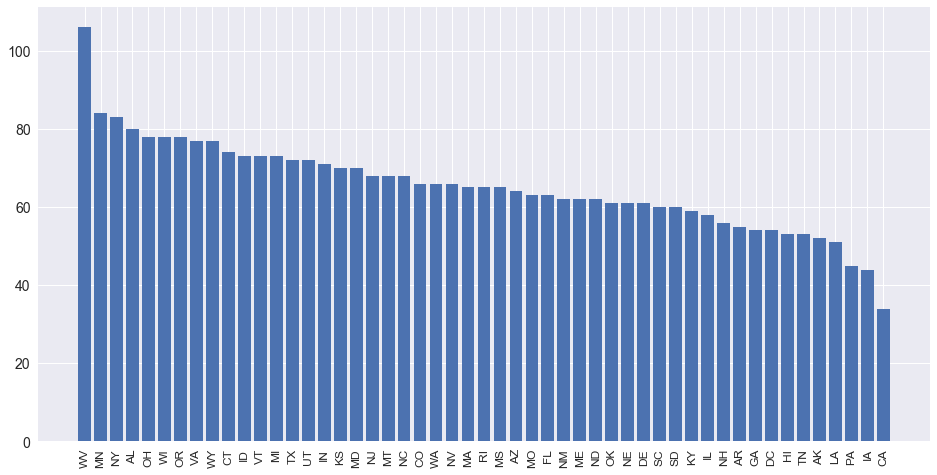

In [99]:
# check customer distribution by state of residence

stateDist = Counter(dfChurn['State']).most_common()
px = [i[0] for i in stateDist]
py = [i[1] for i in stateDist]

plt.figure(figsize=[16,8])
plt.bar(px, py)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=14)
plt.show()

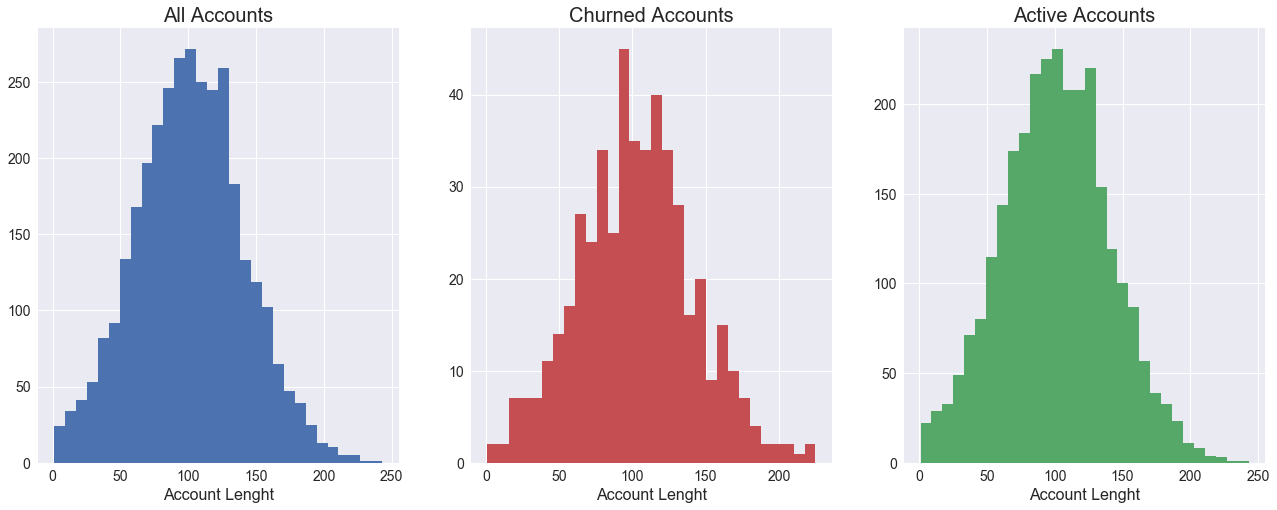

In [100]:
# check distribution of account lengths

px1 = dfChurn['Account Length']
px2 = dfChurn[dfChurn['Churn']==1]['Account Length']
px3 = dfChurn[dfChurn['Churn']==0]['Account Length']

plt.figure(figsize=[22,8])

plt.subplot(1,3,1)
plt.hist(px1, bins=30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Account Lenght', fontsize=16)
plt.title('All Accounts', fontsize=20)

plt.subplot(1,3,2)
plt.hist(px2, bins=30, color='C2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Account Lenght', fontsize=16)
plt.title('Churned Accounts', fontsize=20)

plt.subplot(1,3,3)
plt.hist(px3, bins=30, color='C1')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Account Lenght', fontsize=16)
plt.title('Active Accounts', fontsize=20)
plt.show()

# 5. Working with Unstructured Data
 - Most source data is unstructured
 - If we're lucky, the data will be preprocessed into tabular form
 - But sometimes, we need to work with data in its unstructured form
 - Unstructured data can come in countless different formats
 - Let's look at an example from book reviews

In [101]:
# print out the contents of the original file

with open('BookDesc.txt', 'r') as f:
    for line in f.readlines():
        print(line[:-1])

Hardcover: 600 pages
Publisher: Springer; 1st ed. 2013, Corr. 2nd printing 2018 edition (March 30, 2018)
Language: English
ISBN-10: 1461468485
ISBN-13: 978-1461468486
Product Dimensions: 6.1 x 1.3 x 9.2 inches
Shipping Weight: 2.2 pounds (View shipping rates and policies)
Customer Reviews: 4.5 out of 5 stars   87 customer reviews
Amazon Best Sellers Rank: #50,374 in Books (See Top 100 in Books)

Series: Chapman & Hall/CRC Data Science Series
Hardcover: 310 pages
Publisher: Chapman and Hall/CRC; 1 edition (August 2, 2019)
Language: English
ISBN-10: 1138079227
ISBN-13: 978-1138079229
Product Dimensions: 7.5 x 0.8 x 10 inches
Shipping Weight: 1.9 pounds (View shipping rates and policies)
Customer Reviews: 4.6 out of 5 stars   3 customer reviews
Amazon Best Sellers Rank: #375,953 in Books (See Top 100 in Books)

Paperback: 318 pages
Publisher: O'Reilly Media; 1 edition (June 6, 2017)
Language: English
ISBN-10: 1491952962
ISBN-13: 978-1491952962
Product Dimensions: 6.9 x 0.6 x 9.1 inches
Sh

In [102]:
fullRes = []

with open('BookDesc.txt', 'r') as f:
    for line in f.readlines():
        tmp = line.split(':')
        if tmp[0]=='Publisher':
            tmpRes = []
            thePub = tmp[1].split(';')[0][1:]
            tmpRes.append(thePub)
        elif tmp[0]=='Language':
            theLang = tmp[1][1:-1]
            tmpRes.append(theLang)
        elif tmp[0]=='ISBN-13':
            theISBN_13 = tmp[1][1:-1]
            tmpRes.append(theISBN_13)
        elif tmp[0]=='Product Dimensions':
            theDims = tmp[1][1:-1]
            tmpRes.append(theDims)
        elif tmp[0]=='Shipping Weight':
            theWt = tmp[1].split(' (')[0][1:]
            tmpRes.append(theWt)
            fullRes.append(tuple(tmpRes))

In [103]:
dfBooks = pd.DataFrame(fullRes, columns=['Publisher', 'Language', 'ISBN', 'Dimensions', 'Weight'])
dfBooks

,Publisher,Language,ISBN,Dimensions,Weight
0,Springer,English,978-1461468486,6.1 x 1.3 x 9.2 inches,2.2 pounds
1,Chapman and Hall/CRC,English,978-1138079229,7.5 x 0.8 x 10 inches,1.9 pounds
2,O'Reilly Media,English,978-1491952962,6.9 x 0.6 x 9.1 inches,1.1 pounds
3,Wiley,English,978-1119145677,6 x 1 x 8.9 inches,1.1 pounds
4,Manning Publications,English,978-1617295546,7.4 x 0.8 x 9.2 inches,1.4 pounds
5,Manning Publications,English,978-1617294433,7.4 x 0.8 x 9.2 inches,14.9 ounces
